In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [8]:
data=pd.read_csv("Cardiotocographic.csv")
numeric=data.select_dtypes(include="number")
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
numeric.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [32]:
data_cleaned_rows2 = numeric.dropna()
data_cleaned_rows2.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [33]:
data_cleaned_rows2.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [34]:
for i,column in enumerate(data_cleaned_rows2.columns, 1):
    data_cleaned_rows2[f'{column}_z_score'] = zscore(data_cleaned_rows2[column])
    outliers = data_cleaned_rows2[data_cleaned_rows2[f'{column}_z_score'].abs() > 3]
    upper_limit = data_cleaned_rows2[column].quantile(0.95)
    lower_limit = data_cleaned_rows2[column].quantile(0.05)
    data_cleaned_rows2[column] = data_cleaned_rows2[column].clip(lower=lower_limit, upper=upper_limit)
    print(data_cleaned_rows2[f'{column}_z_score'])


0      -1.184258
1      -0.119246
2      -0.030495
3       0.058256
4      -0.123840
          ...   
2121    0.590762
2122    0.590762
2123    0.590762
2124    0.590762
2125    0.768264
Name: LB_z_score, Length: 2105, dtype: float64
0      -0.740798
1       0.735064
2       0.027778
3      -0.148375
4       0.766312
          ...   
2121   -0.740798
2122   -0.561603
2123   -0.513993
2124   -0.583743
2125   -0.367064
Name: AC_z_score, Length: 2105, dtype: float64
0       -0.146835
1       -0.146835
2       -0.146835
3       -0.146835
4       -0.146835
          ...    
2121    14.019859
2122    -0.146835
2123    -0.146835
2124    -0.146835
2125    -0.149600
Name: FM_z_score, Length: 2105, dtype: float64
0      -1.310156
1       0.594840
2       1.169977
3       1.001632
4       1.121506
          ...   
2121    0.907231
2122    0.773903
2123    0.739115
2124    0.514333
2125    1.101864
Name: UC_z_score, Length: 2105, dtype: float64
0      -0.565300
1       0.387636
2       0.427209
3 

C:\Users\revan\AppData\Local\Temp\ipykernel_57104\539490565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_rows2[f'{column}_z_score'] = zscore(data_cleaned_rows2[column])
C:\Users\revan\AppData\Local\Temp\ipykernel_57104\539490565.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_rows2[column] = data_cleaned_rows2[column].clip(lower=lower_limit, upper=upper_limit)
C:\Users\revan\AppData\Local\Temp\ipykernel_57104\539490565.py:2: SettingWithCopyWarning: 
A value is trying to 

In [37]:

data_cleaned_rows2

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  21.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  21.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  21.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  21.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.029631  0.007426  0.000000  0.0  0.0  75.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  75.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  75.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  75.0   
2125  142.000000  0.001616  0.000000  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV      MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.40000   64.0  0.999926  2.000000  
1      2.1   0.000000  10.40000  130.0  0.000000  1.000000  
2      2.1   0.000000  13.40000  130.0  0.000000  1.000000  
3      2.4   0.000000  18.61169  117.0  1.000000  1.000000  
4      2.4   0.000000  18.61169  117.0  1.000000  1.000000  
...    ...        ...       ...    ...       ...       ...  
2121   0.3  25.000000   7.20000   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.10000   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.10000   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.00000   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.00000   42.0  0.000000  1.000000  

[2105 rows x 14 columns]

In [38]:
summary={}
for column in data_cleaned_rows2.columns:
    mean=data_cleaned_rows2[column].mean()
    median=data_cleaned_rows2[column].median()
    std=data_cleaned_rows2[column].std()
    q1=data_cleaned_rows2[column].quantile(0.25)
    q3=data_cleaned_rows2[column].quantile(0.75)
    iqr=q3-q1
    summary[column] = {
            'Mean': mean,
            'Median': median,
            'Standard Deviation': std,
            'Q1 (25th Percentile)': q1,
            'Q3 (75th Percentile)': q3,
            'Interquartile Range': iqr
        }
summary_data=pd.DataFrame(summary).T

In [39]:
summary_data

Mean      Median  Standard Deviation  Q1 (25th Percentile)  \
LB        133.374914  133.000000            8.926842            126.000000   
AC          0.003064    0.001631            0.003570              0.000000   
FM          0.003536    0.000000            0.007571              0.000000   
UC          0.004305    0.004484            0.002850              0.001838   
DL          0.001792    0.000000            0.002674              0.000000   
DS          0.000000    0.000000            0.000000              0.000000   
DP          0.000119    0.000000            0.000395              0.000000   
ASTV       46.962592   49.000000           16.671558             32.000000   
MSTV        1.296898    1.200000            0.752809              0.700000   
ALTV        9.527470    0.000000           16.852286              0.000000   
MLTV        7.960434    7.400000            4.901032              4.600000   
Width      70.056116   67.000000           37.647021             37.000000   
Tendency    0.318225    0.000000            0.614392              0.000000   
NSP         1.306580    1.000000            0.616262              1.000000   

          Q3 (75th Percentile)  Interquartile Range  
LB                  140.000000            14.000000  
AC                    0.005650             0.005650  
FM                    0.002554             0.002554  
UC                    0.006536             0.004698  
DL                    0.003289             0.003289  
DS                    0.000000             0.000000  
DP                    0.000000             0.000000  
ASTV                 61.000000            29.000000  
MSTV                  1.700000             1.000000  
ALTV                 11.000000            11.000000  
MLTV                 10.900000             6.300000  
Width               100.000000            63.000000  
Tendency              1.000000             1.000000  
NSP                   1.000000             0.000000

# Data visualization

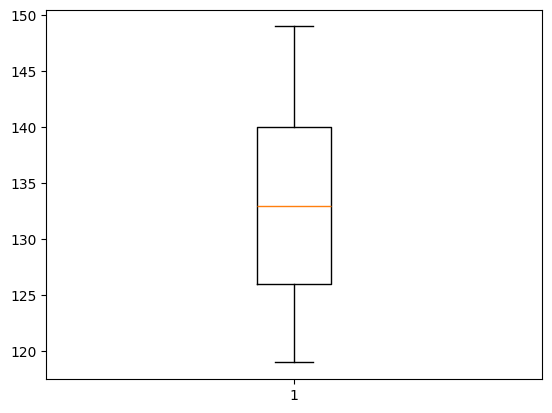

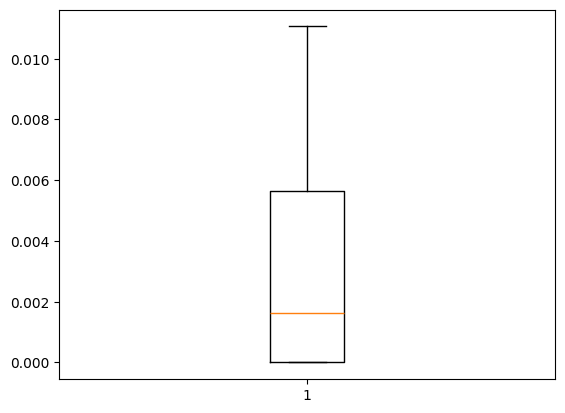

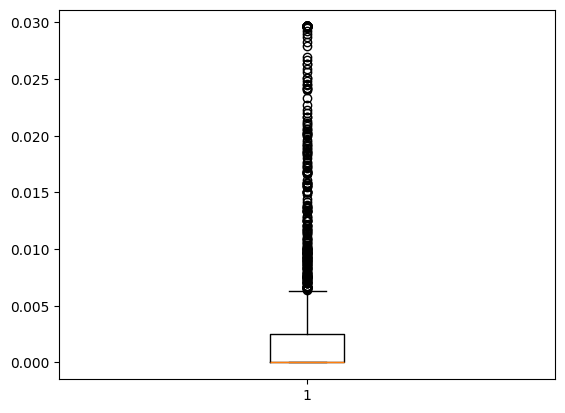

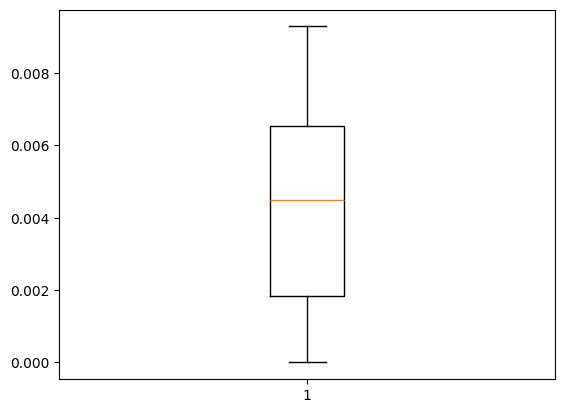

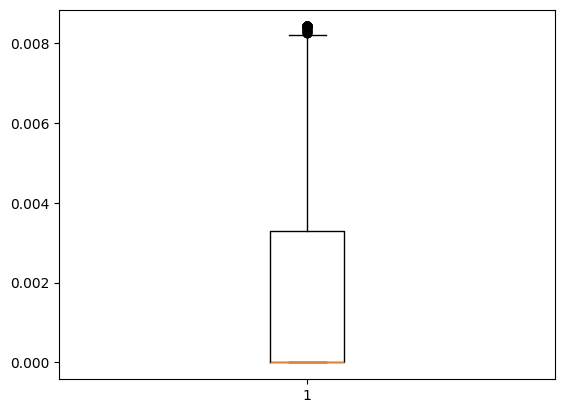

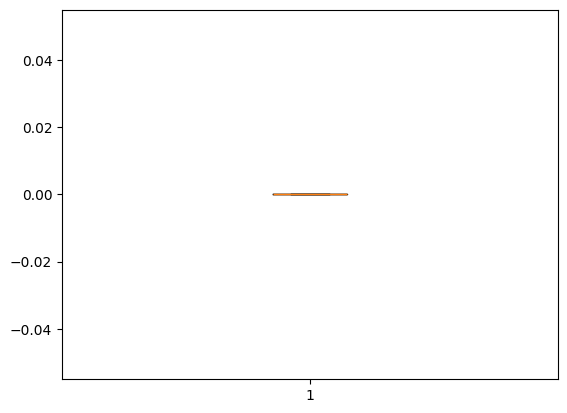

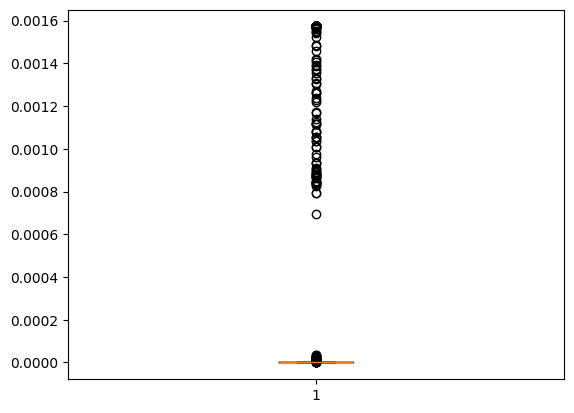

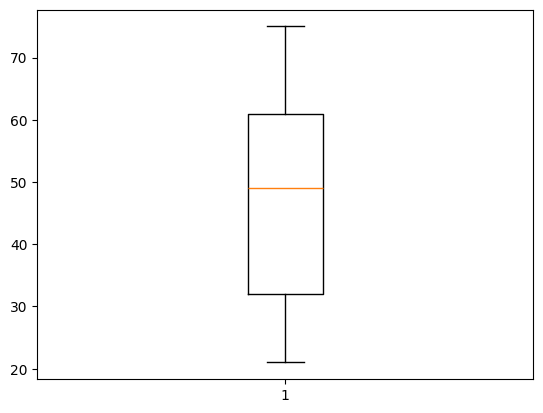

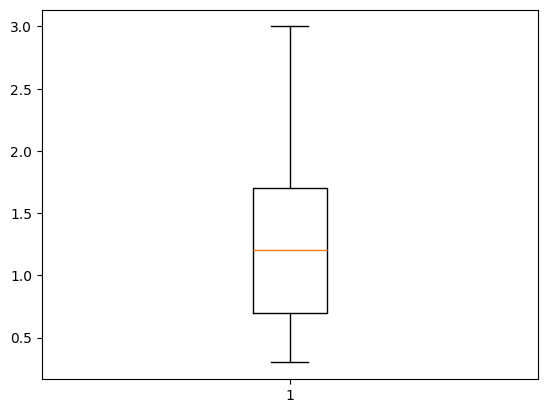

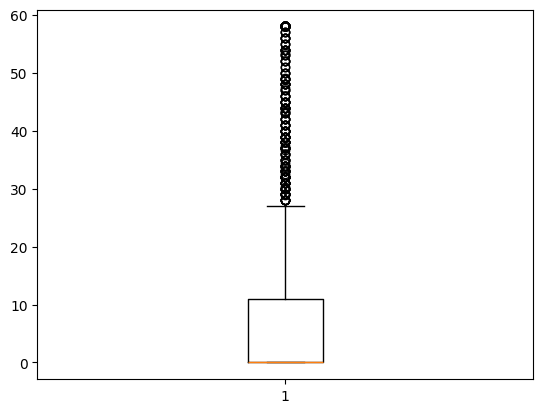

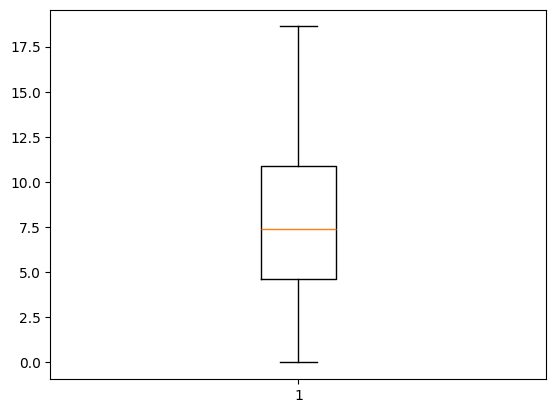

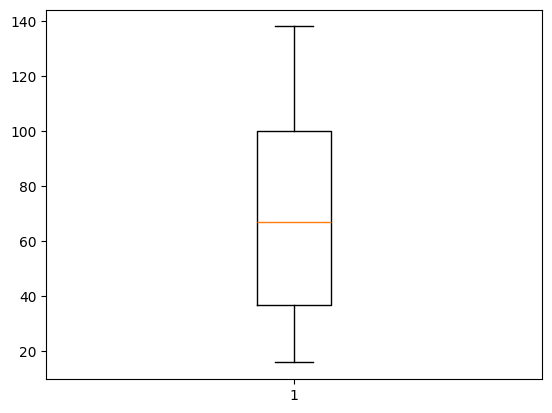

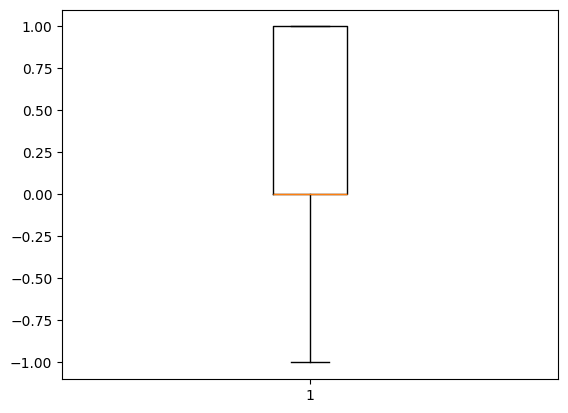

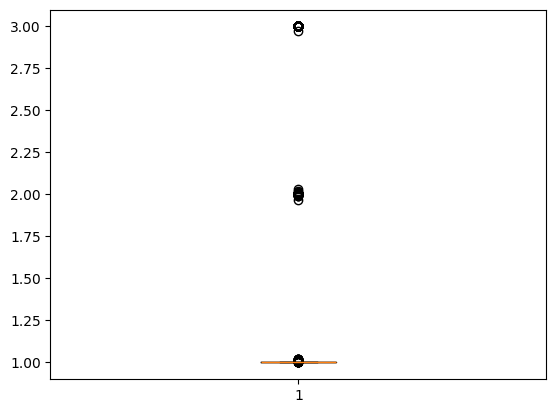

In [40]:
for i,column in enumerate(data_cleaned_rows2.columns):
    plt.boxplot(data_cleaned_rows2[column])
    plt.show()

In [41]:
import seaborn as sns

<Axes: >

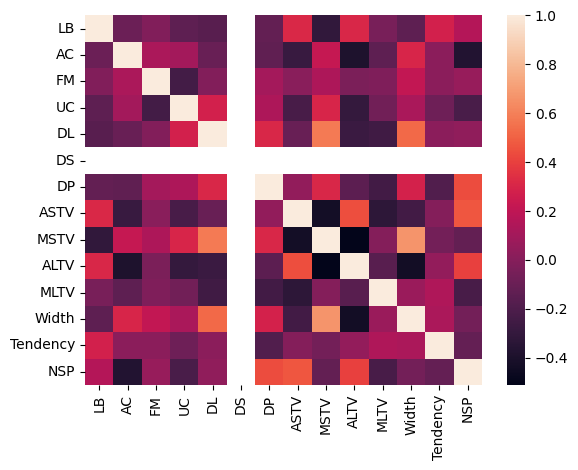

In [42]:
corr=data_cleaned_rows2.corr()
sns.heatmap(corr)

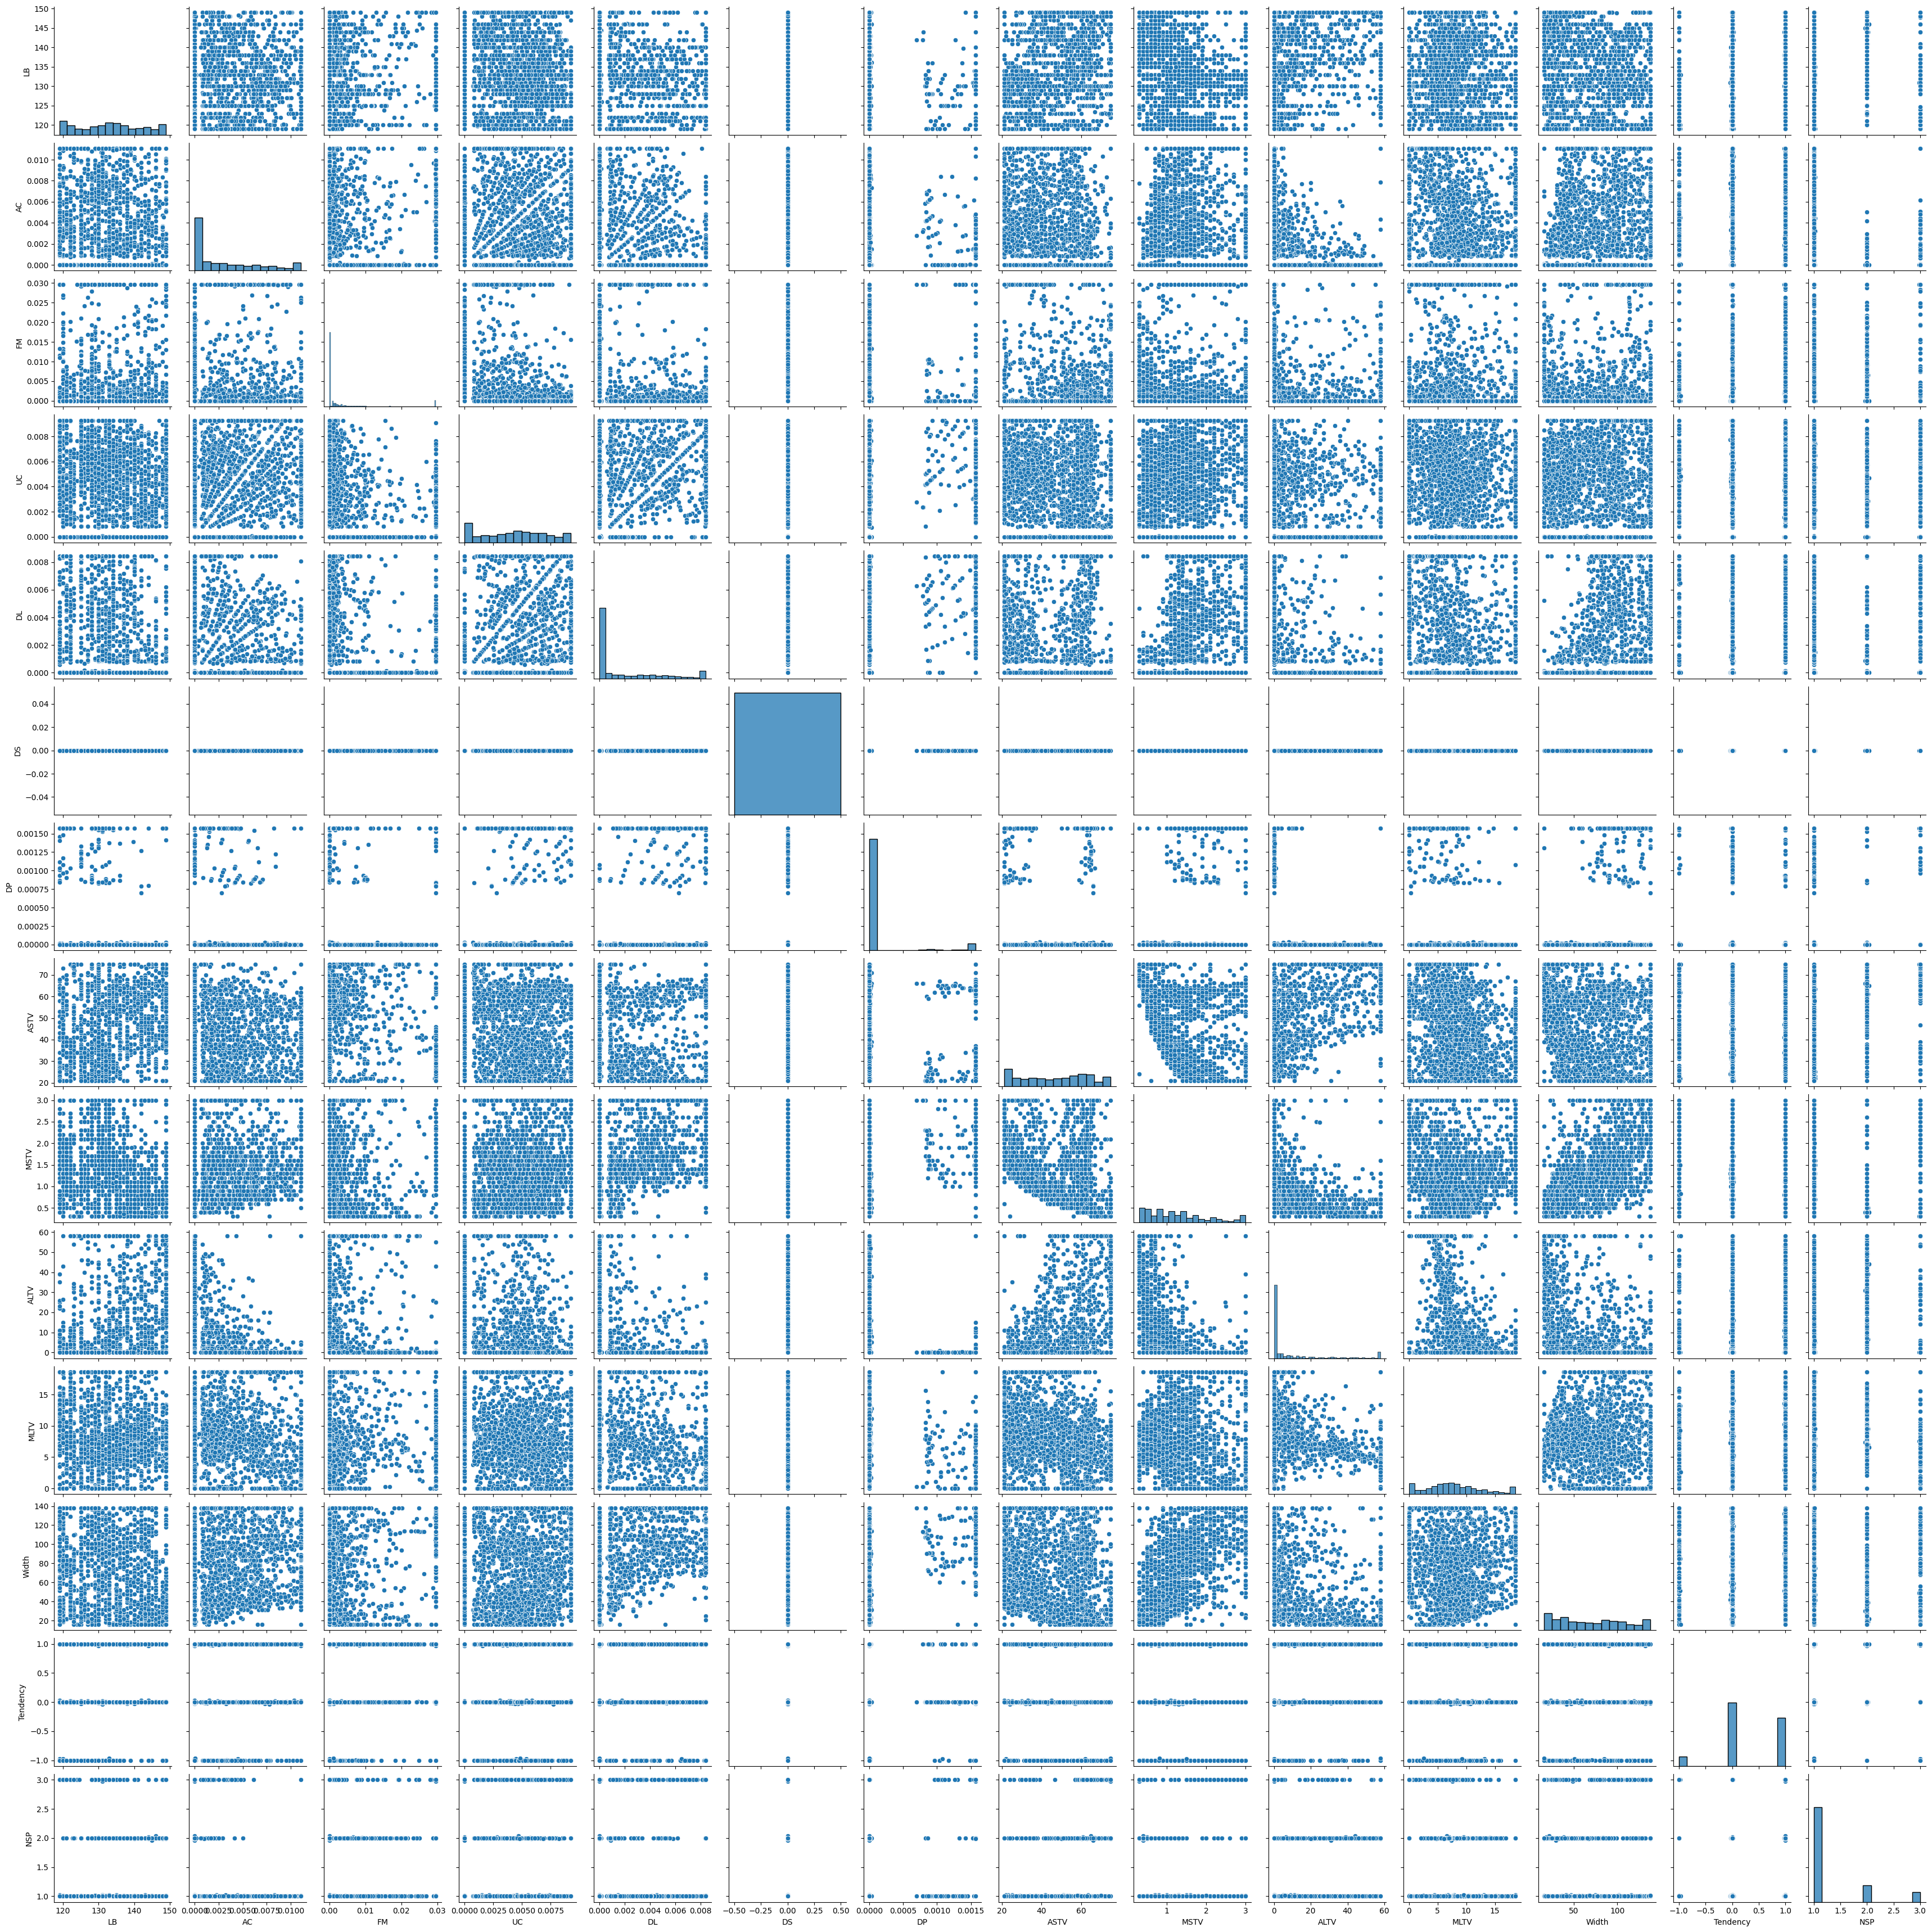

In [44]:
sns.pairplot(data_cleaned_rows2)

# High positive correlations are close to +1 
# High negative correlations are close to -1
# Low or Zero correlations are close to 0 which indicates no linear relationship between variables